### Research Question: 
#### Create a model on lockdown period data and one on non-lockdown data to predict COVID cases in France under each of the conditions. 

Examine if there's a significant difference between the r0 of lockdown and non-lockdown periods. 

### Data:
Worldwide Daily Cases 
Starting date: 22/1/2020 - today

Data extracted from here:
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

Raw Data here:
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv



### Notes:
##### Useful Libraries 
supervised learning - scikit-learn 
https://scikit-learn.org/stable/modules/linear_model.html

DataCamp course: https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn

Timeseries
DataCamp course: https://learn.datacamp.com/courses/manipulating-time-series-data-in-python

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

# import data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/'+\
               'COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'+\
               '/time_series_covid19_confirmed_global.csv')

In [3]:
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833


# Select France's data

In [4]:
exclusion_cols=['Province/State','Country/Region','Lat','Long']
cols_dates=[col for col in df.columns if col not in exclusion_cols]

In [5]:
print(cols_dates[:5])

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20']


In [6]:
condition=df['Country/Region']=='France'
metropole=df['Province/State'].isnull()
df_France=df.loc[condition&metropole,cols_dates].reset_index(drop=True)

In [7]:
df_France.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21
0,0,0,2,3,3,3,4,5,5,5,...,2742349,2762120,2777921,2781503,2800770,2824473,2845701,2866769,2866769,2903975


## Turn column names into list of dates

In [8]:
cum_cases_list = df_France.loc[0,:].values.tolist()
len(cum_cases_list)

362

In [9]:
from dataPreProcessing import *

In [10]:
#turn column strings into dates
time_str=df_France.columns.tolist()
time=str2date(time_str)
time[:4]

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00')]

In [11]:
#finding the difference between two points in days
time_diff_days=time_diff(time)
time_diff_days[:9]

[0, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
time_cumu=np.cumsum(time_diff_days)
print(time_cumu[:10])

[0 1 2 3 4 5 6 7 8 9]


## Find cases per day from cumulative data

In [13]:
dates_list=df_France.columns.to_list()
print(dates_list[:3])

['1/22/20', '1/23/20', '1/24/20']


In [14]:
#Getting difference between consecutive columns
counts=cum2daily(df_France)
print(counts[:4])

[0, 0, 2, 1]


In [15]:
len(counts)

362

In [16]:
len(dates_list)

362

# visualize data

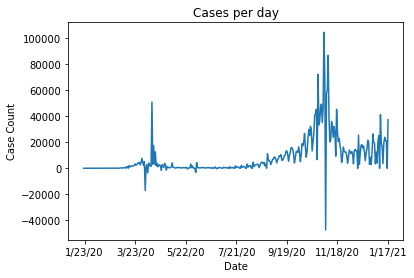

In [17]:
#create plot of cases per day
fig,ax=plt.subplots()
lines=ax.plot(dates_list, counts)
ax.set(Title='Cases per day', xlabel='Date', ylabel='Case Count')
ax.xaxis.set(ticks=range(1,len(dates_list),60))
plt.show()


In [18]:
df_France_counts_day = pd.DataFrame(data=np.array([time,counts]).T,columns=['time_stamp', 'counts'])
df_France_counts_day.head(3)

,time_stamp,counts
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,2


In [19]:
def moving_avg(in_ts,in_series, winlen):
    """
    take a series and a timestamp, make them a df with the timestamp as index and take moving average of n window lengt
    inputs:
    in_ts: list of timestamps 
    in_series: list of integers of which the moving average is needed
    winlen: integer of window length + d if days, s if second etc. example: '7d'
    outputs:
    df_out: df of 2 columns (1)timestamps and (2)moving average of in_series
    
    """
    df=pd.DataFrame(data=np.array([in_ts,in_series]).T,columns=['time_stamp', 'counts'])
    df.index = df.time_stamp
    window_moving_average = df['counts'].rolling(window=winlen).mean()
    
    return  window_moving_average  

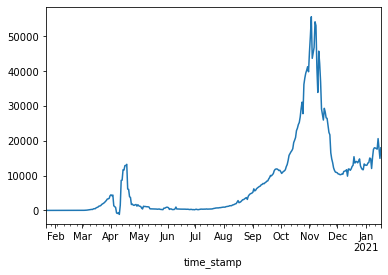

In [20]:
# moving average of 7 days 
seven_day_window_mean = moving_avg(time, counts, '7d')

seven_day_window_mean.plot()
plt.show()

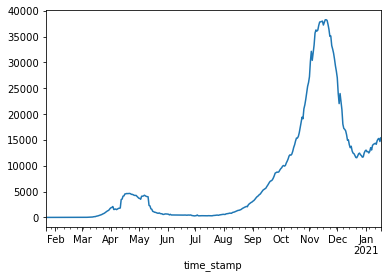

In [21]:
# moving average of 30 days = 1 month 
thirty_day_window_mean = moving_avg(time, counts, '30d')

thirty_day_window_mean.plot()
plt.show()

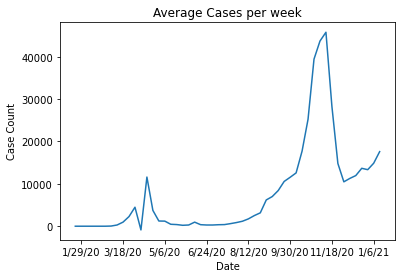

In [22]:
#create plot of cases per week
fig,ax=plt.subplots()
lines=ax.plot(dates_list[::7], seven_day_window_mean.values[::7])
ax.set(Title='Average Cases per week', xlabel='Date', ylabel='Case Count')
ax.xaxis.set(ticks=range(1,len(dates_list)//7,7))
plt.show()

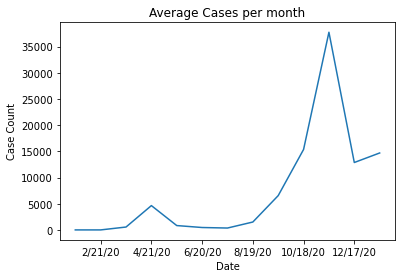

In [23]:
#create plot of cases per month
fig,ax=plt.subplots()
lines=ax.plot(dates_list[::30], thirty_day_window_mean.values[::30])
ax.set(Title='Average Cases per month', xlabel='Date', ylabel='Case Count')
ax.xaxis.set(ticks=range(1,len(dates_list)//30,2))
plt.show()

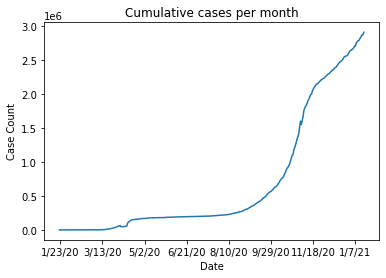

In [24]:
#create plot of cummulative cases versus days
fig,ax=plt.subplots()
lines=ax.plot(dates_list,cum_cases_list)
ax.set(Title='Cumulative cases per month', xlabel='Date', ylabel='Case Count')
ax.xaxis.set(ticks=range(1,len(dates_list),50))
plt.show()

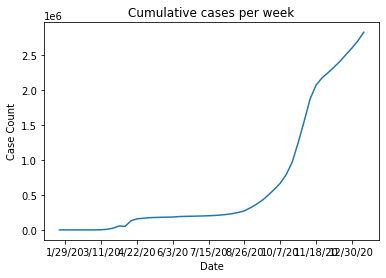

In [25]:
#create plot of cases Vs weeks
fig,ax=plt.subplots()
lines=ax.plot(dates_list[::7],cum_cases_list[::7])
ax.set(Title='Cumulative cases per week', xlabel='Date', ylabel='Case Count')
ax.xaxis.set(ticks=range(1,50,6))
plt.show()

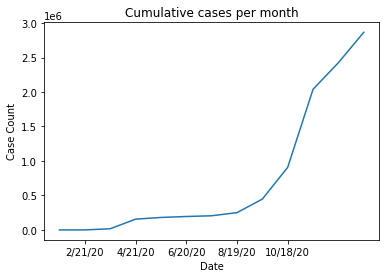

In [26]:
#create plot of cases Vs months
fig,ax=plt.subplots()
lines=ax.plot(dates_list[::30],cum_cases_list[::30])
ax.set(Title='Cumulative cases per month', xlabel='Date', ylabel='Case Count')
ax.xaxis.set(ticks=range(1,10,2))
plt.show()

In [27]:
data = np.array([dates_list, time_cumu, counts, cum_cases_list, 
                 seven_day_window_mean.values,
                 thirty_day_window_mean.values]).T
df_counts_per_day = pd.DataFrame(data=data, columns = ['Date', 'days_since_outbreak',
                                                       'Case Count', 'Cumulative Cases',
                                                       'mov_av_7d','mov_av_30d'])

In [28]:
df_counts_per_day.head(4)

,Date,days_since_outbreak,Case Count,Cumulative Cases,mov_av_7d,mov_av_30d
0,1/22/20,0,0,0,0.0,0.0
1,1/23/20,1,0,0,0.0,0.0
2,1/24/20,2,2,2,0.6666666666666666,0.6666666666666666
3,1/25/20,3,1,3,0.75,0.75


In [29]:
def targets(df, win_size, column):
    """ takes every element of the input df and returns the following window of length 'win_size'
    inputs:
    df: dataframe 
    win_size: integer corresponding to the window size
    column: column of mving average
    outputs:
    y: list containing the i+win_size day"""
    y=[]
    for i in range(len(df)-win_size):
        y.append(float(df.loc[i+win_size,column]))
    return y


In [30]:
y = targets(df_counts_per_day, 7, 'mov_av_7d')

In [31]:
features = [col for col in df_counts_per_day.columns if col!='Date']

In [32]:
def create_features(df, win_size, feat):
    """for each i take all data for the past win_size days
    inputs:
    df: dataframe 
    win_zise: integer corresponding to the window size
    feat: columns from which you take data
    outputs:
    X:array containing all features 
    """
    X=[]    
    for i in range(len(df)-win_size):
        data_point = []
        for col in feat:
            data_point.extend(df.loc[i:i+win_size-1,col]) #pandas : gets extra element
        X.append(data_point)
    X = np.array(X)
    return X
                                        
X=create_features(df_counts_per_day, 7, features)

# Splitting the dataset for evaluation

- Using cross validation
- Testing models on 3 labels:
    - True counts
    - Moving average weekly
    - Moving average monthly

## True counts: best results

In [67]:
y = targets(df_counts_per_day, 7, 'Case Count')
X=create_features(df_counts_per_day, 7, features)
colsFeatures = [feat + '_day_' + str(i) for feat in features for i in range(7)]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

df_ML = pd.DataFrame(data=X,columns=colsFeatures)
df_ML['Target'] = y

y=df_ML['Target'].values
print(y.shape)
y=y.reshape(-1,1)
print(y.shape)
X=df_ML[colsFeatures].values
print(X.shape)

(355,)
(355, 1)
(355, 35)


## Cross validation

In [68]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Lasso regression

In [69]:
lasso_regression = Lasso()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(lasso_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.1s finished


In [70]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.006962,0.004054,0.001552,0.00109,100,{'alpha': 100},-0.082117,-0.168805,-0.442174,0.01463,...,-0.439784,0.561374,1,0.533751,0.5707,0.537843,0.603441,0.620193,0.573186,0.034454


### SVR regression

In [71]:
from sklearn.svm import SVR

svr_regression = SVR(kernel='rbf')
parameters = {'kernel':['poly', 'sigmoid'],}
                #'C':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(svr_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009847,0.001059,0.003375,0.001105,poly,{'kernel': 'poly'},-0.558815,-0.022649,-0.794146,-0.560891,...,-0.348891,0.370489,1,0.106223,0.096319,0.103276,0.309568,0.279695,0.179016,0.094925


### Bayesian Ridge regression

In [73]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
parameters = {'alpha_1':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5],
             'alpha_2':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(reg, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:    0.9s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [74]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,0.015045,0.009821,0.002632,0.002183,1e-05,100000,"{'alpha_1': 1e-05, 'alpha_2': 100000}",-0.796545,-0.715157,-2.032839,...,-4.932746,8.174365,1,0.569872,0.639957,0.57117,0.616914,0.671554,0.613893,0.039437


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=42)

In [76]:
clf.best_estimator_.fit(X_train,y_train)
clf.best_estimator_.predict(X_valid)[:10]

C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([ 8251.85784723,   584.62573901, 16808.03226102,  1911.80561041,
        2581.55587883, 15284.11245126,   228.70325734,  2683.15110977,
        1105.43586666, 21170.8376669 ])

In [77]:
y_valid[:10]

array([[10416.],
       [  508.],
       [15937.],
       [ 1339.],
       [ 2913.],
       [ 3030.],
       [    0.],
       [ 3889.],
       [  341.],
       [28359.]])

## 7 day average counts: best results

In [78]:
y = targets(df_counts_per_day, 7, 'mov_av_7d')
X=create_features(df_counts_per_day, 7, features)
colsFeatures = [feat + '_day_' + str(i) for feat in features for i in range(7)]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

df_ML = pd.DataFrame(data=X,columns=colsFeatures)
df_ML['Target'] = y

y=df_ML['Target'].values
print(y.shape)
y=y.reshape(-1,1)
print(y.shape)
X=df_ML[colsFeatures].values
print(X.shape)

(355,)
(355, 1)
(355, 35)


## Cross validation

### Lasso regression

In [79]:
lasso_regression = Lasso()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(lasso_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished


In [80]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.016,0.003579,0.001601,0.00196,10,{'alpha': 10},0.881908,0.885447,0.876744,0.949689,...,0.880188,0.045183,1,0.984845,0.986766,0.984905,0.99046,0.984682,0.986332,0.0022


### SVR regression

In [81]:
from sklearn.svm import SVR

svr_regression = SVR(kernel='rbf')
parameters = {'kernel':['poly', 'sigmoid'],}
                #'C':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(svr_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020774,0.002262,0.005639,0.000173,poly,{'kernel': 'poly'},-3.109897,-0.109196,-6.943331,-0.825098,...,-2.071535,2.73914,1,0.337547,0.306936,0.33837,0.594144,0.600134,0.435426,0.132537


### Bayesion Ridge regression

In [83]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
parameters = {'alpha_1':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5],
             'alpha_2':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(reg, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 567 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:    0.7s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [84]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
112,0.002404,0.001963,0.0008,0.0016,100000,0.001,"{'alpha_1': 100000, 'alpha_2': 0.001}",0.829988,0.821588,0.841933,...,0.752534,0.223384,1,0.986501,0.98921,0.986503,0.992593,0.988605,0.988682,0.00224


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=42)

In [86]:
clf.best_estimator_.fit(X_train,y_train)
clf.best_estimator_.predict(X_valid)[:10]

C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([ 7415.27924743,   322.21328691, 16626.96832146,   945.2557089 ,
        2295.26393557, 13863.28213108,    66.20709752,  2418.46955721,
         356.20837942, 26106.37021773])

## Moving Average Monthly: Best Results 

In [89]:
y = targets(df_counts_per_day, 30, 'mov_av_30d')
X=create_features(df_counts_per_day, 30, features)
colsFeatures = [feat + '_day_' + str(i) for feat in features for i in range(30)]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

df_ML = pd.DataFrame(data=X,columns=colsFeatures)
df_ML['Target'] = y

y=df_ML['Target'].values
print(y.shape)
y=y.reshape(-1,1)
print(y.shape)
X=df_ML[colsFeatures].values
print(X.shape)

(332,)
(332, 1)
(332, 150)


## Cross validation

In [90]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Lasso regression

In [91]:
lasso_regression = Lasso()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(lasso_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  32 out of  55 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.3s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35127936.4144519, tolerance: 3612956.303448186
  model = cd_fast.enet_coordinate_descent(


In [92]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.075531,0.011067,0.000822,0.001645,1,{'alpha': 1},0.941035,0.996936,0.992878,0.994153,...,0.983701,0.021378,1,0.99927,0.999073,0.999082,0.999591,0.998846,0.999172,0.000249


### SVR regression

In [93]:
from sklearn.svm import SVR

svr_regression = SVR(kernel='rbf')
parameters = {'kernel':['poly', 'sigmoid'],}
                #'C':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(svr_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [94]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018366,0.000075,0.0042,0.000038,poly,{'kernel': 'poly'},-1.52238,-4.401729,-8.376377,-1.109304,...,-2.982879,3.12553,1,0.407204,0.372391,0.397993,0.584322,0.56549,0.46548,0.090268


### Bayesian Ridge regression

In [95]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
parameters = {'alpha_1':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5],
             'alpha_2':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(reg, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 563 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:    3.5s finished
C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [96]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
80,0.038728,0.003929,0.001598,0.001958,100,0.01,"{'alpha_1': 100, 'alpha_2': 0.01}",0.950677,0.99548,0.988508,...,0.983664,0.016727,1,0.999328,0.999128,0.999132,0.99975,0.998997,0.999267,0.000264


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=42)

In [98]:
clf.best_estimator_.fit(X_train,y_train)
clf.best_estimator_.predict(X_valid)[:10]

C:\Users\panlo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([  241.89537355, 12789.79678074,  3648.07284899,  3114.61715402,
        5147.40580986,   788.95486194, 30115.67000551,  1507.06318423,
        6283.21001588,  3558.15791035])

In [99]:
y_valid[:10]

array([[  254.66666667],
       [12760.43333333],
       [ 4097.4       ],
       [ 3137.06666667],
       [ 4627.06666667],
       [  708.63333333],
       [31780.93333333],
       [ 1443.5       ],
       [ 6235.        ],
       [ 3456.06666667]])

## 7 day average counts: Random input model

In [133]:
y = targets(df_counts_per_day, 7, 'mov_av_7d')
X=create_features(df_counts_per_day, 7, features)
X_random = np.random.rand(X.shape[0],X.shape[1])
colsFeatures = [feat + '_day_' + str(i) for feat in features for i in range(7)]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler.fit(X_random)
X_random = scaler.transform(X_random)

df_ML = pd.DataFrame(data=X,columns=colsFeatures)
df_ML['Target'] = y

y=df_ML['Target'].values
print(y.shape)
y=y.reshape(-1,1)
print(y.shape)
X=df_ML[colsFeatures].values
print(X.shape)

(355,)
(355, 1)
(355, 35)


## Cross validation

### Lasso regression

In [179]:
lasso_regression = Lasso()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(lasso_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  32 out of  55 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.1s finished


In [180]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.015202,0.002993,0.0016,0.00196,10,{'alpha': 10},0.881908,0.885447,0.876744,0.949689,...,0.880188,0.045183,1,0.984845,0.986766,0.984905,0.99046,0.984682,0.986332,0.0022


In [181]:
cols = [col for col in results.columns if 'test_score' in col and 'mean' not in col 
        and 'std' not in col and 'rank' not in col]
R2 = results.loc[cond,cols].iloc[0].values
R2

array([0.88190801, 0.88544708, 0.87674438, 0.94968904, 0.80714909])

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=42)

In [183]:
clf.best_estimator_.fit(X_train,y_train)
clf.best_estimator_.predict(X_valid)[:10]

array([ 7441.80797861,   296.91576165, 16222.96496657,   963.02873003,
        2188.36679721, 14378.54799772,    31.85774452,  2375.60373215,
         518.93659848, 28068.71049937])

In [184]:
y_valid[:10]

array([[7.75100000e+03],
       [2.85142857e+02],
       [1.63225714e+04],
       [8.62142857e+02],
       [2.27485714e+03],
       [1.27927143e+04],
       [7.14285714e-01],
       [2.56928571e+03],
       [3.59000000e+02],
       [2.82738571e+04]])

### Lasso regression Random input

In [185]:
lasso_regression = Lasso()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
clf = GridSearchCV(lasso_regression, parameters, cv=5, scoring='r2', 
                   verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X_random, y)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  55 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.0s finished


In [186]:
cond = results['mean_test_score']==results['mean_test_score'].max()

results[cond]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,0.000998,0.000002,0.000637,0.000366,1000,{'alpha': 1000},-51.010407,-5.026297,-61.479176,-0.894212,...,-24.027307,26.548963,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000994,0.000201,0.000411,0.000504,10000,{'alpha': 10000},-51.010407,-5.026297,-61.479176,-0.894212,...,-24.027307,26.548963,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.000442,0.000543,0.000698,0.000967,100000,{'alpha': 100000},-51.010407,-5.026297,-61.479176,-0.894212,...,-24.027307,26.548963,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
cols = [col for col in results.columns if 'test_score' in col and 'mean' not in col 
        and 'std' not in col and 'rank' not in col]
rand_R2 = results.loc[cond,cols].iloc[0].values
rand_R2

array([-51.01040671,  -5.02629708, -61.47917643,  -0.89421244,
        -1.72644277])

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_random,y, test_size=0.33, random_state=42)

In [189]:
clf.best_estimator_.fit(X_train,y_train)
clf.best_estimator_.predict(X_valid)[:10]

array([8447.44484629, 8447.44484629, 8447.44484629, 8447.44484629,
       8447.44484629, 8447.44484629, 8447.44484629, 8447.44484629,
       8447.44484629, 8447.44484629])

In [190]:
y_valid[:10]

array([[7.75100000e+03],
       [2.85142857e+02],
       [1.63225714e+04],
       [8.62142857e+02],
       [2.27485714e+03],
       [1.27927143e+04],
       [7.14285714e-01],
       [2.56928571e+03],
       [3.59000000e+02],
       [2.82738571e+04]])

## Statistical test

In [191]:
from scipy.stats import ttest_ind

In [192]:
ttest_ind(a=R2,b=rand_R2,equal_var=True)

Ttest_indResult(statistic=1.876341349766242, pvalue=0.09745230919181107)

In [193]:
from scipy.stats import f_oneway

In [194]:
f_oneway(R2,rand_R2)

F_onewayResult(statistic=3.520656860842601, pvalue=0.0974523091918113)